In [2]:
import os
try:
    if RUN: os.chdir(BASE_PATH)
except:
    BASE_PATH=os.getcwd()
RUN=True
os.chdir("../")
from conf import *
from scripts.dataset.dataset import *
import torch
from PIL import Image
from matplotlib import pyplot as plt
from scripts.metrics import compute_iou
from scripts.utilities.parse_config  import Config
import pandas as pd

In [3]:
pjoin=lambda lst: os.path.join(*lst)

In [4]:
folderpath=np.array([os.path.join("saves",f"UNet_1_EXP_{i}") for i in range(15)])

In [5]:
folderpath

array(['saves\\UNet_1_EXP_0', 'saves\\UNet_1_EXP_1',
       'saves\\UNet_1_EXP_2', 'saves\\UNet_1_EXP_3',
       'saves\\UNet_1_EXP_4', 'saves\\UNet_1_EXP_5',
       'saves\\UNet_1_EXP_6', 'saves\\UNet_1_EXP_7',
       'saves\\UNet_1_EXP_8', 'saves\\UNet_1_EXP_9',
       'saves\\UNet_1_EXP_10', 'saves\\UNet_1_EXP_11',
       'saves\\UNet_1_EXP_12', 'saves\\UNet_1_EXP_13',
       'saves\\UNet_1_EXP_14'], dtype='<U19')

In [6]:
def draw(res_path_list,log_file,linestyle="-",**ax,):
    for id,folder in enumerate(res_path_list):
    # folder=folderpath[0]
        conf=Config(pjoin([folder,"config.json"]))
        conf.get_param()
        df=pd.read_json(pjoin([conf.get_result_folder(),log_file]))
        draw_loss_acc_MA(id,df,conf,log_file,linestyle,**ax)



def draw_loss_acc_MA(id,df,conf,log_file,linestyle,**ax):
        for key in ["loss","accuracy"]:
            df[key+"_MA30"]=df[key].rolling(30).mean()

        for key in ["loss","accuracy"]:
            # df_train[[key]].plot(ax=ax[key],xlabel="batch",ylabel="loss")
            df[key+"_MA30"].plot(ax=ax[key],linewidth=2,linestyle=linestyle,color=f"C{id}",label=f"{log_file.split('.')[0]} {conf.get_aug_mode()}",title=key)
            ax[key].legend()

def draw_lr(res_path_list,log_file,linestyle="-",**ax,):
    for id,folder in enumerate(res_path_list):
    # folder=folderpath[0]
        conf=Config(pjoin([folder,"config.json"]))
        conf.get_param()
        df=pd.read_json(pjoin([conf.get_result_folder(),log_file]))
        draw_loss_acc_MA_lr(id,df,conf,log_file,linestyle,**ax)



def draw_loss_acc_MA_lr(id,df,conf,log_file,linestyle,**ax):
        for key in ["loss","accuracy"]:
            df[key+"_MA30"]=df[key].rolling(30).mean()

        for key in ["loss","accuracy"]:
            # df_train[[key]].plot(ax=ax[key],xlabel="batch",ylabel="loss")
            df[key+"_MA30"].plot(ax=ax[key],linewidth=1,linestyle=linestyle,color=f"C{id}",label=f"{log_file.split('.')[0]} {conf.get_lr()}",title=key)
            ax[key].legend()

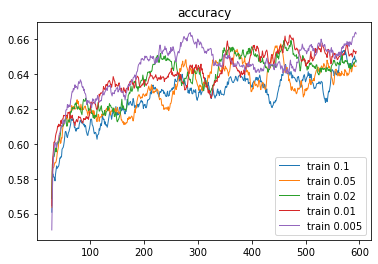

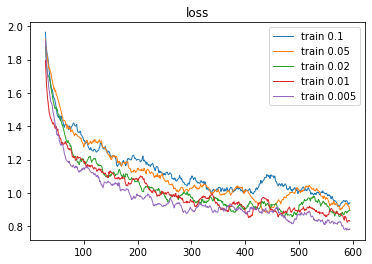

In [7]:
fig_acc=plt.figure()
ax_acc=fig_acc.subplots(1,1)

fig_loss=plt.figure()
ax_loss=fig_loss.subplots(1,1)
draw_lr(folderpath[[0,3,6,9,12]],log_file="train.json",linestyle="-",**{"loss":ax_loss,"accuracy":ax_acc})
# draw(folderpath[[-3,-2,-1]],log_file="val.json",**{"loss":ax_loss,"accuracy":ax_acc})

In [8]:
def get_df(res_path_list,log_file):
    df_total=[]
    for id,folder in enumerate(res_path_list):
    # folder=folderpath[0]
        conf=Config(pjoin([folder,"config.json"]))
        df=pd.read_json(pjoin([conf.get_result_folder(),log_file])).join(pd.DataFrame.from_dict([conf.get_param()]),how="cross")
        df["model"]=conf.get_model_name()
        df=df.rename_axis('minibatch').reset_index()
        df_total.append(df)
        # print(df)
    return pd.concat(df_total,axis=0)

In [9]:
folderpath=list(map(lambda x: pjoin(["saves",x]),[
    "UNet_1_EXP_12",
    "UNet_1_EXP_13",
    "UNet_1_EXP_14",
    "UNet_2_EXP_12",
    "UNet_2_EXP_13",
    "UNet_2_EXP_14",
    "UNet_2_1_EXP_12",
    "UNet_2_1_EXP_13",
    "UNet_2_1_EXP_14",
]))

In [10]:
folderpath

['saves\\UNet_1_EXP_12',
 'saves\\UNet_1_EXP_13',
 'saves\\UNet_1_EXP_14',
 'saves\\UNet_2_EXP_12',
 'saves\\UNet_2_EXP_13',
 'saves\\UNet_2_EXP_14',
 'saves\\UNet_2_1_EXP_12',
 'saves\\UNet_2_1_EXP_13',
 'saves\\UNet_2_1_EXP_14']

model
UNet_1      AxesSubplot(0.125,0.125;0.775x0.755)
UNet_2      AxesSubplot(0.125,0.125;0.775x0.755)
UNet_2_1    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

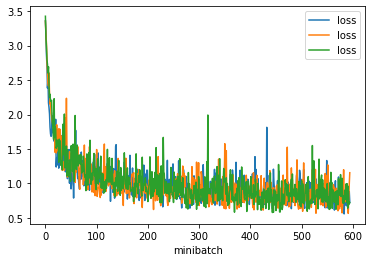

In [41]:
df=get_df(folderpath,log_file="train.json")
df_temp=df
fig=plt.figure()
ax=fig.subplots(1,1)
df_temp.groupby("learning_rate").get_group(0.005)[["loss","aug_mode","model","accuracy","minibatch"]].groupby("aug_mode").get_group("None")[["loss","minibatch","model"]].groupby("model").plot(ax=ax,y="loss",x="minibatch")

# fig=plt.figure()
# ax=fig.subplots(1,1)
# for aug_mode in ["None","Only","Both"]:
#     df_temp=(df.groupby("aug_mode").get_group(aug_mode).groupby("learning_rate").get_group(0.005).groupby("epoch").get_group(1))
#     df_temp.set_index("minibatch",inplace=True)
#     print
#     df_temp["accuracy"].rolling(30).mean().plot(ax=ax,label=aug_mode,xlabel="minibatch",ylabel="accuracy")
# ax.legend()

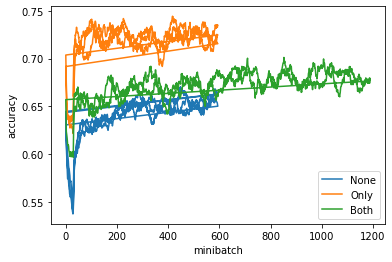

In [187]:
fig=plt.figure()
ax=fig.subplots(1,1)
for aug_mode in ["None","Only","Both"]:
    df_temp=(df.groupby("aug_mode").get_group(aug_mode).groupby("learning_rate").get_group(0.005).groupby("epoch").get_group(1))
    df_temp.set_index("minibatch",inplace=True)
    df_temp["accuracy"].rolling(30).mean().plot(ax=ax,label=aug_mode,xlabel="minibatch",ylabel="accuracy")
ax.legend()

In [160]:
df

,minibatch,epoch,loss,accuracy,learning_rate,epochs,batch_size,aug_mode,save_inter_model,model
0,0,1,3.549698,0.003807,0.100,1,5,None,False,UNet_1
1,1,1,2.569564,0.507912,0.100,1,5,None,False,UNet_1
2,2,1,2.346682,0.591706,0.100,1,5,None,False,UNet_1
3,3,1,2.270092,0.620269,0.100,1,5,None,False,UNet_1
4,4,1,2.317801,0.586588,0.100,1,5,None,False,UNet_1
...,...,...,...,...,...,...,...,...,...,...
1185,1185,1,0.726632,0.625935,0.005,1,5,Both,False,UNet_1
1186,1186,1,0.919797,0.742081,0.005,1,5,Both,False,UNet_1
1187,1187,1,1.091743,0.599340,0.005,1,5,Both,False,UNet_1
1188,1188,1,0.754001,0.749744,0.005,1,5,Both,False,UNet_1


AxesSubplot(0.125,0.125;0.775x0.755)


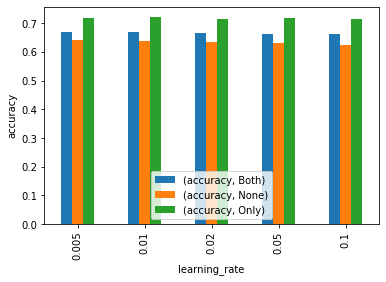

In [178]:
fig=plt.figure()
ax=fig.subplots(1,1)
# for id,aug_mode in enumerate(["None","Only","Both"]):
df_temp=(df.groupby("epoch").get_group(1))
# df_temp.set_index("learning_rate",inplace=True)
df_temp=df_temp[["accuracy","learning_rate","aug_mode"]].groupby(["aug_mode","learning_rate"]).agg("mean").unstack(0).plot.bar(ax=ax,label=aug_mode,xlabel="learning_rate",ylabel="accuracy")
print(df_temp)
# .plot(ax=ax,label=aug_mode,xlabel="learning_rate",ylabel="accuracy")
# print(df_temp)
    
ax.legend()

# Draw accuracy and loss

In [115]:
df_temp=(df.groupby("aug_mode").get_group(aug_mode).groupby("minibatch").get_group(400).groupby("epoch").get_group(1))
df_temp.set_index("learning_rate")

,minibatch,epoch,loss,accuracy,epochs,batch_size,aug_mode,save_inter_model,model
learning_rate,,,,,,,,,
0.100,400,1,1.218154,0.670645,1,5,Both,False,UNet_1
0.050,400,1,1.508777,0.600835,1,5,Both,False,UNet_1
0.020,400,1,1.203211,0.697273,1,5,Both,False,UNet_1
0.010,400,1,1.323247,0.601867,1,5,Both,False,UNet_1
0.005,400,1,0.853552,0.676151,1,5,Both,False,UNet_1


In [116]:
df_temp

,minibatch,epoch,loss,accuracy,learning_rate,epochs,batch_size,aug_mode,save_inter_model,model
400,400,1,1.218154,0.670645,0.100,1,5,Both,False,UNet_1
400,400,1,1.508777,0.600835,0.050,1,5,Both,False,UNet_1
400,400,1,1.203211,0.697273,0.020,1,5,Both,False,UNet_1
400,400,1,1.323247,0.601867,0.010,1,5,Both,False,UNet_1
400,400,1,0.853552,0.676151,0.005,1,5,Both,False,UNet_1
